In [1]:
# basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

In [2]:
# machine learning basics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
from collections import Counter

In [123]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# dimension reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
# imbalanced data
# undersample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks

# oversample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

# synthetic
from imblearn.combine import SMOTEENN

# metrics
from imblearn.metrics import classification_report_imbalanced

In [6]:
# sklearn & imblearn pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

In [7]:
df = pd.read_csv('df_scaled.csv')

In [8]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


---

## Approach 1: Rebalancing the data with Under/Over-Sampling

##### Train Test Split

In [10]:
# split into predictors and target
X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
original_X_train, original_X_test, original_y_train, original__test = train_test_split(X, y, test_size=0.2, random_state=42)

Train: [202113  76521  34887 ...  10034  31368  41510] Test: [ 80631  26633 273008 ...  84843  22075 250212]
Train: [235731 102152 132866 ...  47205 199032   2426] Test: [ 78680 136162 206563 ...  81832 136652 265859]
Train: [172588   3138  84089 ...  87079  49539  74793] Test: [188215  66762 246999 ...  95387 165726 120394]
Train: [ 62894 119204  27101 ... 107502 213243  69829] Test: [202262 176685 135318 ...  31280 283803  11634]
Train: [262522 265908 203733 ... 252899 186183 102337] Test: [ 94132 112195  37207 ... 160555 225665 119393]


In [12]:
# turn into array
original_X_train = original_X_train.values
original_X_test = original_X_test.values
original_y_train = original_y_train.values
original_y_test = original_y_test.values

In [13]:
# check if the density of the target class is preserved while splitting
train_unique_label, train_counts_label = np.unique(original_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_y_test, return_counts=True)

print('Label Distributions: ')
print(train_counts_label / len(original_y_train))
print(test_counts_label / len(original_y_test))

# label distributions are very well preserved

Label Distributions: 
[0.99827173 0.00172827]
[0.99827955 0.00172045]


In [14]:
print('original_X_train: ', len(original_X_train))
print('original_X_test: ', len(original_X_test))

original_X_train:  256326
original_X_test:  28481


##### Clustering

In [17]:
# used the X_test dataset, as t-SNE is extremely CPU intensive
# t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(original_X_test)

In [16]:
# PCA
X_pca = PCA(n_components=2, random_state=42).fit_transform(original_X_test)

In [31]:
# TruncatedSVD
X_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(original_X_test)

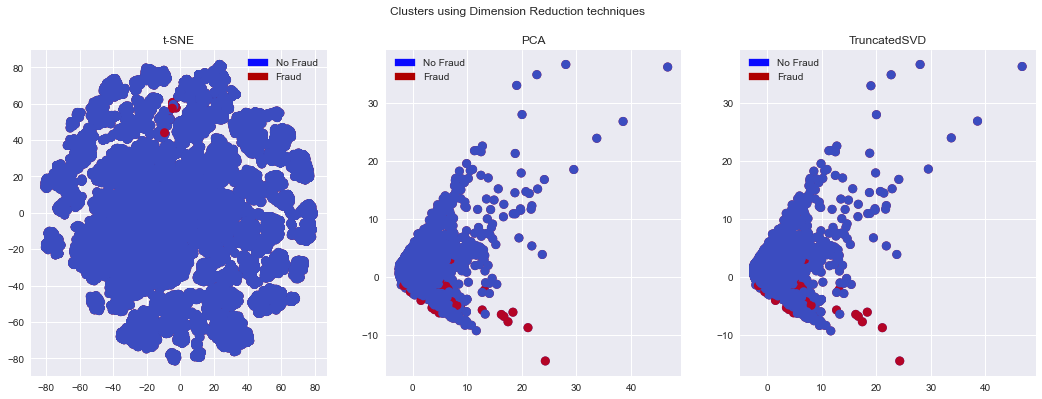

In [57]:
# plot
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
f.suptitle('Clusters using Dimension Reduction techniques')

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(original_y_test==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(original_y_test==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE')
ax1.legend(handles=[blue_patch, red_patch])

# PCA
ax2.scatter(X_pca[:,0], X_pca[:,1], c=(original_y_test==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_pca[:,0], X_pca[:,1], c=(original_y_test==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA')
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD
ax3.scatter(X_svd[:,0], X_svd[:,1], c=(original_y_test==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_svd[:,0], X_svd[:,1], c=(original_y_test==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('TruncatedSVD')
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

##### Undersampling Train test split

In [15]:
# because we are dealing with imbalanced data where the minority only accounts
# for 0.17% of data, normal train test split would cause problem, so we use
# the StratifiedShuffleSplit which creates splits by preserving the same
# percentage for each target class as in the complete set
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, random_state=None)

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print('Train:', train_index, 'Test:', test_index)
    undersample_X_train, undersample_X_test = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_y_train, undersample_y_test = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_X_train = undersample_X_train.values
undersample_X_test = undersample_X_test.values
undersample_y_train = undersample_y_train.values
undersample_y_test = undersample_y_test.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

Train: [ 59671  50275 163875 ... 165575  27606  83197] Test: [212161 278897  52001 ... 150751 148418  76671]
Train: [ 11102 100249  57911 ... 157690 117254 115211] Test: [282409  54258  63773 ... 119405 195041  71375]
Train: [147403   4362  43952 ... 141282  11377 150945] Test: [205537  71770 163309 ... 231723 267469 178795]
Train: [199356  10682 230035 ...  99547  29303 112604] Test: [122749 235675 161072 ... 254532 192089 211416]
Train: [110349 246073 113700 ...  64443 189470 170100] Test: [279053  20702 100187 ... 266963  80720 228386]


In [16]:
# check if the density of the target class is preserved while splitting
train_unique_label, train_counts_label = np.unique(undersample_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(undersample_y_test, return_counts=True)

print('Label Distributions: ')
print(train_counts_label / len(undersample_y_train))
print(test_counts_label / len(undersample_y_test))

Label Distributions: 
[0.99827173 0.00172827]
[0.99827955 0.00172045]


In [17]:
print('undersample_X_train: ', len(undersample_X_train))
print('undersample_X_test: ', len(undersample_X_test))

undersample_X_train:  256326
undersample_X_test:  28481


### A subtle but fatal mistake!!

I trained and evaluated models right after this step and intended to do cross validations afterwards. However, some of the results were so impressive that I thought they were too good to be true! It turned out that I under/oversampled before cross validation causing "data leakage" problem!

##### (Example: Random Oversampling + Random Forest)

In [110]:
for train, test in sss.split(original_X_train, original_y_train):
    overfit_ros_rf_pipeline = imbalanced_make_pipeline(RandomOverSampler(), random_forest)
    overfit_ros_rf_model = overfit_ros_rf_pipeline.fit(original_X_train, original_y_train)
    overfit_ros_rf_prediction = overfit_ros_rf_model.predict(original_X_test)

In [111]:
print('Classifcation report:\n', classification_report(original_y_test, overfit_ros_rf_prediction))
conf_mat = confusion_matrix(y_true=original_y_test, y_pred=overfit_ros_rf_prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.91      0.82      0.86        49

    accuracy                           1.00     28481
   macro avg       0.95      0.91      0.93     28481
weighted avg       1.00      1.00      1.00     28481

Confusion matrix:
 [[28428     4]
 [    9    40]]


The results (f1 score = 0.86) is incredible. However, this is wrong

We should make cross validation happen at the same time we are down/over-sampling

### Training classifiers + Cross validation

In [18]:
# logistic regression + GridSearchCV
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(undersample_X_train, undersample_y_train)
log_reg = grid_log_reg.best_estimator_

In [21]:
# Random Forest + RandomizedSearchCV

# create the random grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=4, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(undersample_X_train, undersample_y_train)
rf = rf_random.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed: 19.9min remaining: 59.8min
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 85.0min remaining: 17.0min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 85.5min finished


### Undersampling

##### (Random undersampling + logistic regression)

In [23]:
for train, test in sss.split(undersample_X_train, undersample_y_train):
    rus_lr_pipeline = imbalanced_make_pipeline(RandomUnderSampler(), log_reg)
    rus_lr_model = rus_lr_pipeline.fit(undersample_X_train, undersample_y_train)
    rus_lr_prediction = rus_lr_model.predict(undersample_X_test)

In [24]:
print('Classifcation report:\n', classification_report(undersample_y_test, rus_lr_prediction))
conf_mat = confusion_matrix(y_true=undersample_y_test, y_pred=rus_lr_prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     28432
           1       0.03      0.94      0.05        49

    accuracy                           0.94     28481
   macro avg       0.51      0.94      0.51     28481
weighted avg       1.00      0.94      0.97     28481

Confusion matrix:
 [[26771  1661]
 [    3    46]]


##### (NearMiss + logistic regression)

In [25]:
for train, test in sss.split(undersample_X_train, undersample_y_train):
    nm_lr_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    nm_lr_model = nm_lr_pipeline.fit(undersample_X_train, undersample_y_train)
    nm_lr_prediction = nm_lr_model.predict(undersample_X_test)

In [26]:
print('Classifcation report:\n', classification_report(undersample_y_test, nm_lr_prediction))
conf_mat = confusion_matrix(y_true=undersample_y_test, y_pred=nm_lr_prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.55      0.71     28432
           1       0.00      0.94      0.01        49

    accuracy                           0.55     28481
   macro avg       0.50      0.75      0.36     28481
weighted avg       1.00      0.55      0.71     28481

Confusion matrix:
 [[15759 12673]
 [    3    46]]


##### (Random undersampling + random forest)

In [28]:
for train, test in sss.split(undersample_X_train, undersample_y_train):
    rus_rf_pipeline = imbalanced_make_pipeline(RandomUnderSampler(), rf)
    rus_rf_model = rus_rf_pipeline.fit(undersample_X_train, undersample_y_train)
    rus_rf_prediction = rus_rf_model.predict(undersample_X_test)

In [29]:
print('Classifcation report:\n', classification_report(undersample_y_test, rus_rf_prediction))
conf_mat = confusion_matrix(y_true=undersample_y_test, y_pred=rus_rf_prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.08      0.90      0.15        49

    accuracy                           0.98     28481
   macro avg       0.54      0.94      0.57     28481
weighted avg       1.00      0.98      0.99     28481

Confusion matrix:
 [[27927   505]
 [    5    44]]


##### (NearMiss + random forest)

In [30]:
for train, test in sss.split(undersample_X_train, undersample_y_train):
    nm_rf_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), rf)
    nm_rf_model = nm_rf_pipeline.fit(undersample_X_train, undersample_y_train)
    nm_rf_prediction = nm_rf_model.predict(undersample_X_test)

In [31]:
print('Classifcation report:\n', classification_report(undersample_y_test, nm_rf_prediction))
conf_mat = confusion_matrix(y_true=undersample_y_test, y_pred=nm_rf_prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.20     28432
           1       0.00      1.00      0.00        49

    accuracy                           0.11     28481
   macro avg       0.50      0.55      0.10     28481
weighted avg       1.00      0.11      0.20     28481

Confusion matrix:
 [[ 3112 25320]
 [    0    49]]


### Oversampling

#### (logistic regression)

##### (Random oversampling + logistic regression)

In [76]:
for train, test in sss.split(original_X_train, original_y_train):
    ros_lr_pipeline = imbalanced_make_pipeline(RandomOverSampler(), log_reg)
    ros_lr_model = ros_lr_pipeline.fit(original_X_train, original_y_train)
    ros_lr_prediction = ros_lr_model.predict(original_X_test)

In [77]:
print('Classifcation report:\n', classification_report(original_y_test, ros_lr_prediction))
conf_mat = confusion_matrix(y_true=original_y_test, y_pred=ros_lr_prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.06      0.88      0.12        49

    accuracy                           0.98     28481
   macro avg       0.53      0.93      0.55     28481
weighted avg       1.00      0.98      0.99     28481

Confusion matrix:
 [[27803   629]
 [    6    43]]


##### (SMOTE + logistic regression)

In [78]:
for train, test in sss.split(original_X_train, original_y_train):
    smote_lr_pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_reg)
    smote_lr_model = smote_lr_pipeline.fit(original_X_train, original_y_train)
    smote_lr_prediction = smote_lr_model.predict(original_X_test)

In [79]:
print('Classifcation report:\n', classification_report(original_y_test, smote_lr_prediction))
conf_mat = confusion_matrix(y_true=original_y_test, y_pred=smote_lr_prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.06      0.88      0.11        49

    accuracy                           0.98     28481
   macro avg       0.53      0.93      0.55     28481
weighted avg       1.00      0.98      0.99     28481

Confusion matrix:
 [[27745   687]
 [    6    43]]


##### (Borderline SMOTE + logistic regression)

In [63]:
for train, test in sss.split(original_X_train, original_y_train):
    bsmote_lr_pipeline = imbalanced_make_pipeline(BorderlineSMOTE(sampling_strategy='minority'), log_reg)
    bsmote_lr_model = bsmote_lr_pipeline.fit(original_X_train, original_y_train)
    bsmote_lr_prediction = bsmote_lr_model.predict(original_X_test)

In [64]:
print('Classifcation report:\n', classification_report(original_y_test, bsmote_lr_prediction))
conf_mat = confusion_matrix(y_true=original_y_test, y_pred=bsmote_lr_prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     28432
           1       0.15      0.86      0.26        49

    accuracy                           0.99     28481
   macro avg       0.58      0.92      0.63     28481
weighted avg       1.00      0.99      0.99     28481

Confusion matrix:
 [[28203   229]
 [    7    42]]


##### (ADASYN + logistic regression)

In [80]:
for train, test in sss.split(original_X_train, original_y_train):
    adasyn_lr_pipeline = imbalanced_make_pipeline(ADASYN(sampling_strategy='minority'), log_reg)
    adasyn_lr_model = adasyn_lr_pipeline.fit(original_X_train, original_y_train)
    adasyn_lr_prediction = adasyn_lr_model.predict(original_X_test)

In [81]:
print('Classifcation report:\n', classification_report(original_y_test, adasyn_lr_prediction))
conf_mat = confusion_matrix(y_true=original_y_test, y_pred=adasyn_lr_prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     28432
           1       0.02      0.96      0.04        49

    accuracy                           0.91     28481
   macro avg       0.51      0.93      0.49     28481
weighted avg       1.00      0.91      0.95     28481

Confusion matrix:
 [[25855  2577]
 [    2    47]]


#### (Random forest)

##### (Random oversampling + random forest)

In [ ]:
for train, test in sss.split(original_X_train, original_y_train):
    ros_rf_pipeline = imbalanced_make_pipeline(RandomOverSampler(), rf)
    ros_rf_model = ros_rf_pipeline.fit(original_X_train, original_y_train)
    ros_rf_prediction = ros_rf_model.predict(original_X_test)

In [52]:
print('Classifcation report:\n', classification_report(original_y_test, ros_rf_prediction))
conf_mat = confusion_matrix(y_true=original_y_test, y_pred=ros_rf_prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.07      0.88      0.13        49

    accuracy                           0.98     28481
   macro avg       0.53      0.93      0.56     28481
weighted avg       1.00      0.98      0.99     28481

Confusion matrix:
 [[27837   595]
 [    6    43]]


##### (SMOTE + random forest)

In [ ]:
for train, test in sss.split(original_X_train, original_y_train):
    smote_rf_pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rf)
    smote_rf_model = smote_rf_pipeline.fit(original_X_train, original_y_train)
    smote_rf_prediction = smote_rf_model.predict(original_X_test)

In [ ]:
print('Classifcation report:\n', classification_report(original_y_test, smote_rf_prediction))
conf_mat = confusion_matrix(y_true=original_y_test, y_pred=smote_rf_prediction)
print('Confusion matrix:\n', conf_mat)

##### (Borderline SMOTE + random forest)

In [ ]:
for train, test in sss.split(original_X_train, original_y_train):
    bsmote_rf_pipeline = imbalanced_make_pipeline(BorderlineSMOTE(sampling_strategy='minority'), rf)
    bsmote_rf_model = bsmote_rf_pipeline.fit(original_X_train, original_y_train)
    bsmote_rf_prediction = bsmote_rf_model.predict(original_X_test)

In [ ]:
print('Classifcation report:\n', classification_report(original_y_test, bsmote_rf_prediction))
conf_mat = confusion_matrix(y_true=original_y_test, y_pred=bsmote_rf_prediction)
print('Confusion matrix:\n', conf_mat)

##### (ADASYN + random forest)

In [ ]:
for train, test in sss.split(original_X_train, original_y_train):
    adasyn_rf_pipeline = imbalanced_make_pipeline(ADASYN(sampling_strategy='minority'), rf)
    adasyn_rf_model = adasyn_rf_pipeline.fit(original_X_train, original_y_train)
    adasyn_rf_prediction = adasyn_rf_model.predict(original_X_test)

In [ ]:
print('Classifcation report:\n', classification_report(original_y_test, adasyn_rf_prediction))
conf_mat = confusion_matrix(y_true=original_y_test, y_pred=adasyn_rf_prediction)
print('Confusion matrix:\n', conf_mat)

---

## Approach 2: Threshold moving

##### Train test split

In [118]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(
        df.loc[:,'scaled_amount':'V28'], df.Class,  stratify=df.Class, 
        test_size=0.3, random_state=42)

##### (Logistic Regression)

In [159]:
lr_classifier = LogisticRegression().fit(Xtrain,ytrain)

In [160]:
hardpredtst=lr_classifier.predict(Xtest)
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Legit)', 'True 1(Fraud)'], 
            columns=['Pred 0(Approve as Legit)', 
                            'Pred 1(Deny as Fraud)'])
conf_matrix(ytest,hardpredtst)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 85280 (TNR = 99.98%),FP = 15 (FPR = 0.02%)
True 1(Fraud),FN = 55 (FNR = 37.16%),TP = 93 (TPR = 62.84%)


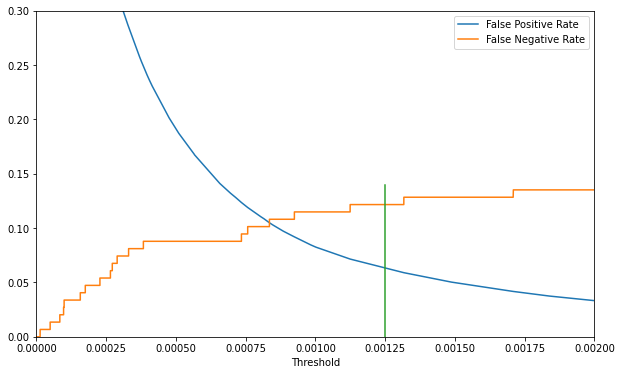

In [165]:
predtst=lr_classifier.predict_proba(Xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest, predtst)
dfplot=pd.DataFrame({'Threshold':thresholds, 
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
ax.plot([0.00125,0.00125],[0,0.14])
ax.set_xbound(0,0.002); ax.set_ybound(0,0.3)

In [166]:
hardpredtst_tuned_thresh = np.where(predtst >= 0.00125, 1, 0)
conf_matrix(ytest, hardpredtst_tuned_thresh)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 79934 (TNR = 93.71%),FP = 5361 (FPR = 6.29%)
True 1(Fraud),FN = 18 (FNR = 12.16%),TP = 130 (TPR = 87.84%)


##### (Random Forest Classifier)

In [135]:
rf_classifier = RandomForestClassifier().fit(Xtrain,ytrain)

In [136]:
hardpredtst=rf_classifier.predict(Xtest)
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Legit)', 'True 1(Fraud)'], 
            columns=['Pred 0(Approve as Legit)', 
                            'Pred 1(Deny as Fraud)'])
conf_matrix(ytest,hardpredtst)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 85288 (TNR = 99.99%),FP = 7 (FPR = 0.01%)
True 1(Fraud),FN = 37 (FNR = 25.00%),TP = 111 (TPR = 75.00%)


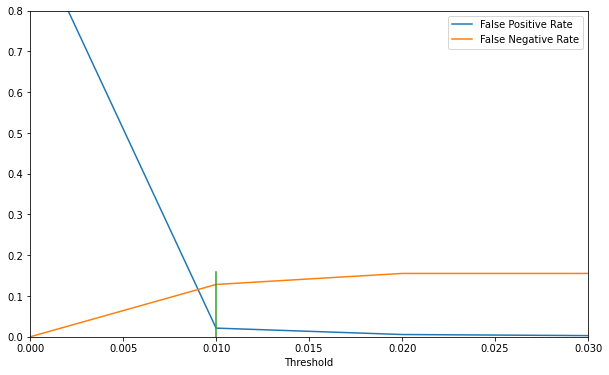

In [149]:
predtst=rf_classifier.predict_proba(Xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest, predtst)
dfplot=pd.DataFrame({'Threshold':thresholds, 
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
ax.plot([0.01,0.01],[0,0.16])
ax.set_xbound(0,0.03); ax.set_ybound(0,0.8)

# in this case, we might choose to apply a threshold of 0.01

In [150]:
hardpredtst_tuned_thresh = np.where(predtst >= 0.01, 1, 0)
conf_matrix(ytest, hardpredtst_tuned_thresh)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 83478 (TNR = 97.87%),FP = 1817 (FPR = 2.13%)
True 1(Fraud),FN = 19 (FNR = 12.84%),TP = 129 (TPR = 87.16%)


##### (Histogram-based GB classifier)

In [129]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
gbc=HistGradientBoostingClassifier(learning_rate=0.01, 
        max_iter=2000, max_leaf_nodes=6, validation_fraction=0.2, 
        n_iter_no_change=15, random_state=42).fit(Xtrain,ytrain)

In [130]:
hardpredtst=gbc.predict(Xtest)
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Legit)', 'True 1(Fraud)'], 
            columns=['Pred 0(Approve as Legit)', 
                            'Pred 1(Deny as Fraud)'])
conf_matrix(ytest,hardpredtst)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 85284 (TNR = 99.99%),FP = 11 (FPR = 0.01%)
True 1(Fraud),FN = 40 (FNR = 27.03%),TP = 108 (TPR = 72.97%)


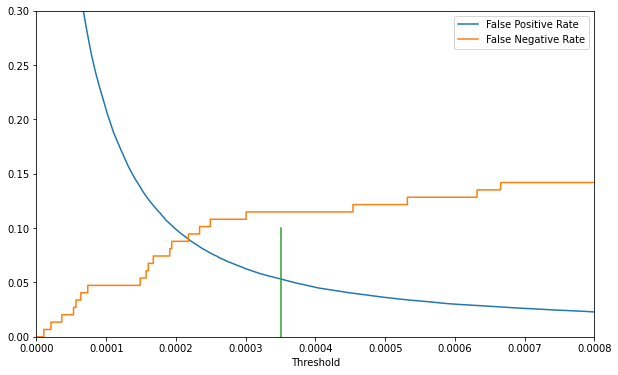

In [131]:
predtst=gbc.predict_proba(Xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest, predtst)
dfplot=pd.DataFrame({'Threshold':thresholds, 
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
ax.plot([0.00035,0.00035],[0,0.1])
ax.set_xbound(0,0.0008); ax.set_ybound(0,0.3)

In [132]:
hardpredtst_tuned_thresh = np.where(predtst >= 0.00035, 1, 0)
conf_matrix(ytest, hardpredtst_tuned_thresh)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 80752 (TNR = 94.67%),FP = 4543 (FPR = 5.33%)
True 1(Fraud),FN = 17 (FNR = 11.49%),TP = 131 (TPR = 88.51%)


Much to my surprise, the Random Forest Classifier did a better job than the more advanced histogram-based Gradient Boosting classification tree algorithm